In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binom_test 
import os

import seaborn as sns
sns.set(font_scale= 1.5)
sns.set_style('whitegrid') 

import sys
sys.path.append('/work-zfs/abattle4/heyuan/old_work_files/yuan/tools/python_lib/lib/python2.7/site-packages')

from matplotlib_venn import venn3, venn2

from statsmodels.stats.multitest import multipletests
sns.set(font_scale= 1.5)
sns.set_style('whitegrid')

from scipy.stats import ranksums


In [42]:
def accuracy_metric(sample):
    discover_number = []
    precision_matric = []
    
    for minDP in range(3,11):
        bowtie_matrix = pd.read_csv('confusion_matrices/%s_bowtie_GATK_DPmin%d_SNPs.txt' % (sample, minDP), 
                                    sep='\t', index_col = 0)
        discover_number.append(list(np.diag(bowtie_matrix)) + [minDP])
        sensitivity_arr = np.diag(np.array(bowtie_matrix) / np.reshape(np.array(bowtie_matrix.sum(axis=1)), [1,3]))
        specificity_arr = np.diag(np.array(bowtie_matrix) / np.reshape(np.array(bowtie_matrix.sum(axis=0)), [1,3]))
        F1_arr = 2 / (1/sensitivity_arr + 1/specificity_arr)
        precision_matric.append(list(sensitivity_arr) + 
                                list(specificity_arr) + 
                                list(F1_arr) + 
                                [minDP])
        
                
    discover_df = pd.DataFrame(discover_number)
    discover_df.columns = ['AA', 'AB', 'BB', 'minDP']
    discover_df = discover_df[discover_df['minDP'] > 3]
    
    discover_df = discover_df.melt(id_vars='minDP')
    discover_df['Genotype'] = discover_df['variable']
    discover_df['Metric'] = 'Number of called variants'
    

    precision_df = pd.DataFrame(precision_matric)
    precision_df.columns = ['Recall_AA','Recall_AB','Recall_BB',
                            'Precision_AA', 'Precision_AB', 'Precision_BB', 
                            'F1score_AA', 'F1score_AB', 'F1score_BB',
                            'minDP']

    precision_df = precision_df.melt(id_vars='minDP')
    precision_df['Genotype'] = [x.split('_')[1] for x in precision_df['variable']]
    precision_df['Metric'] = [x.split('_')[0] for x in precision_df['variable']]
    
    
    return [discover_df, precision_df]

In [61]:
def accuracy_metric_noAmbig(sample):
    discover_number = []
    precision_matric = []
    
    for minDP in range(3,11):
        bowtie_matrix = pd.read_csv('confusion_matrices/%s_bowtie_GATK_DPmin%d_SNPs_noAmbig.txt' % (sample, minDP), 
                                    sep='\t', index_col = 0)
        discover_number.append(list(np.diag(bowtie_matrix)) + [minDP])
        sensitivity_arr = np.diag(np.array(bowtie_matrix) / np.reshape(np.array(bowtie_matrix.sum(axis=1)), [1,3]))
        specificity_arr = np.diag(np.array(bowtie_matrix) / np.reshape(np.array(bowtie_matrix.sum(axis=0)), [1,3]))
        F1_arr = 2 / (1/sensitivity_arr + 1/specificity_arr)
        precision_matric.append(list(sensitivity_arr) + 
                                list(specificity_arr) + 
                                list(F1_arr) + 
                                [minDP])
        
                
    discover_df = pd.DataFrame(discover_number)
    discover_df.columns = ['AA', 'AB', 'BB', 'minDP']
    discover_df = discover_df[discover_df['minDP'] > 3]
    
    discover_df = discover_df.melt(id_vars='minDP')
    discover_df['Genotype'] = discover_df['variable']
    discover_df['Metric'] = 'Number of called variants'
    

    precision_df = pd.DataFrame(precision_matric)
    precision_df.columns = ['Recall_AA','Recall_AB','Recall_BB',
                            'Precision_AA', 'Precision_AB', 'Precision_BB', 
                            'F1score_AA', 'F1score_AB', 'F1score_BB',
                            'minDP']

    precision_df = precision_df.melt(id_vars='minDP')
    precision_df['Genotype'] = [x.split('_')[1] for x in precision_df['variable']]
    precision_df['Metric'] = [x.split('_')[0] for x in precision_df['variable']]
    
    precision_df['Sample'] = sample
    discover_df['Sample']= sample
    
    
    return [discover_df, precision_df]

In [47]:
sample = 'HG00108'
[N, metrics_df] = accuracy_metric(sample)
[N_noAmbig, metrics_df_noAmbig] = accuracy_metric_noAmbig(sample)

<Figure size 432x288 with 0 Axes>

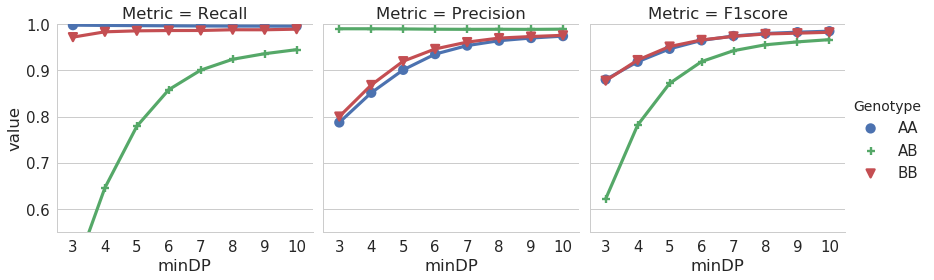

<Figure size 432x288 with 0 Axes>

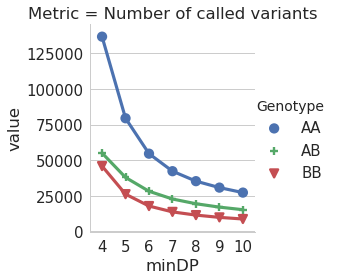

<Figure size 432x288 with 0 Axes>

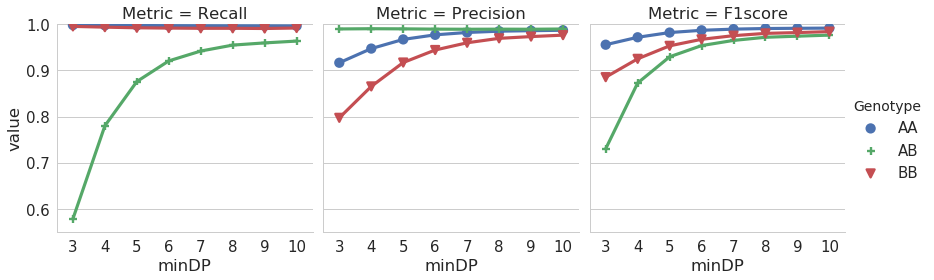

<Figure size 432x288 with 0 Axes>

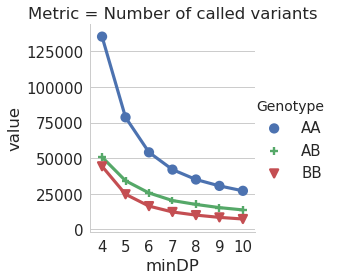

In [60]:

plt.figure()
sns.factorplot(data = metrics_df, x = 'minDP', y = 'value', 
               hue = 'Genotype', col = 'Metric', markers = ['o', '+', 'v'])
plt.ylim(0.55, 1)
plt.show()
plt.close()


plt.figure()
sns.factorplot(data = N, x = 'minDP', y = 'value', 
               hue = 'Genotype', col = 'Metric', markers = ['o', '+', 'v'])
plt.show()
plt.close()





plt.figure()
sns.factorplot(data = metrics_df_noAmbig, x = 'minDP', y = 'value', 
               hue = 'Genotype', col = 'Metric', markers = ['o', '+', 'v'])
plt.ylim(0.55, 1)
plt.show()
plt.close()


plt.figure()
sns.factorplot(data = N_noAmbig, x = 'minDP', y = 'value', 
               hue = 'Genotype', col = 'Metric', markers = ['o', '+', 'v'])
plt.show()
plt.close()

In [76]:
collection_df_metrices = pd.DataFrame()
collection_df_N = pd.DataFrame()

sampleList = ['HG00096','HG00105','HG00106','HG00108','HG00109','HG00114','HG00117','HG00118','HG00120']
for sample in sampleList:
    [N_noAmbig, metrics_df_noAmbig] = accuracy_metric_noAmbig(sample)
    
    collection_df_N = collection_df_N.append(N_noAmbig)
    collection_df_metrices = collection_df_metrices.append(metrics_df_noAmbig)

<Figure size 432x288 with 0 Axes>

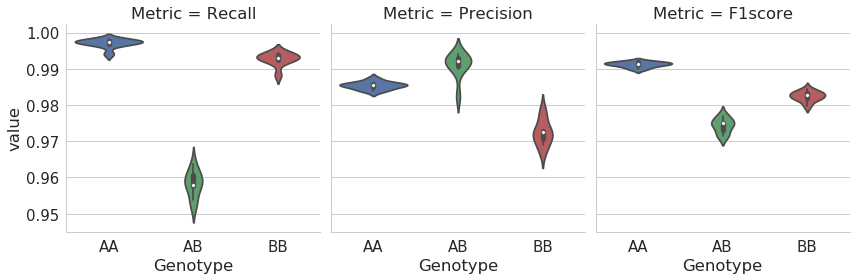

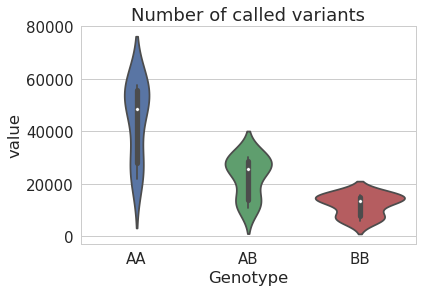

In [88]:
plot_df = collection_df_metrices[collection_df_metrices['minDP'] == 10]

plt.figure()
ax = sns.factorplot(data = plot_df, x = 'Genotype', y = 'value', 
               col = 'Metric', kind = 'violin')
plt.show()
plt.close()



plot_df = collection_df_N[collection_df_N['minDP'] == 10]

plt.figure()
ax = sns.violinplot(data = plot_df, x = 'Genotype', y = 'value')
plt.title('Number of called variants')
plt.show()
plt.close()